In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys 
sys.path.insert(0, '../src/')
import jsm_SHMR
import galhalo

from astropy.table import Table
import os
import warnings; warnings.simplefilter('ignore')


$\log_{10} (M_{*}) = \log_{10} (\epsilon M_{1})+ \alpha \log_{10} (M_{peak}) - \alpha \log_{10}(M_1)$

$ M_{*} = \epsilon M_{1} \left( \frac{M_{peak}}{M_1} \right)^{\alpha}$

$ M_{*} = \left( \epsilon M_{1}^{1-\alpha} \right) \left( M_{peak} \right)^{\alpha} $

$\log_{10} (M_{*}) = \alpha \log_{10} (M_{peak}) + \log_{10}\left( \epsilon M_{1}^{1-\alpha} \right)$

$y = mx + b$, where $a$ is the slope, and $b$ the intercept, is a function of the slope and the normalization 



------------------------------




$\sigma(M_{peak}) = \sigma_0 + \gamma \left( \log_{10} (M_{peak}) − \log_{10}( M_1 ) \right)$ for the increasing scatter!

In [3]:
def dex(value):
    
    #10^(0.1) = 0.1 dex
    
    return 10**(value)

In [4]:
def single_samp(lgMv, dex):

    log_e = -1.5
    a = 1.82
    lgMs = log_e + 12.5 + a*lgMv - a*12.5
    scatter = np.random.normal(loc=0, scale=dex, size=(lgMs.shape[0])) # the standard normal PDF
    return (lgMs + scatter)- (dex**2)/4.605

In [5]:
halo_masses = np.log10(np.logspace(7, 14, 100)) # just for the model

stellar_masses = galhalo.lgMs_D22(halo_masses) 

stellar_masses_15 = single_samp(halo_masses, 0.1) 

stellar_masses_5 = single_samp(halo_masses, 0.5) 

stellar_masses_2 = single_samp(halo_masses, 1) 

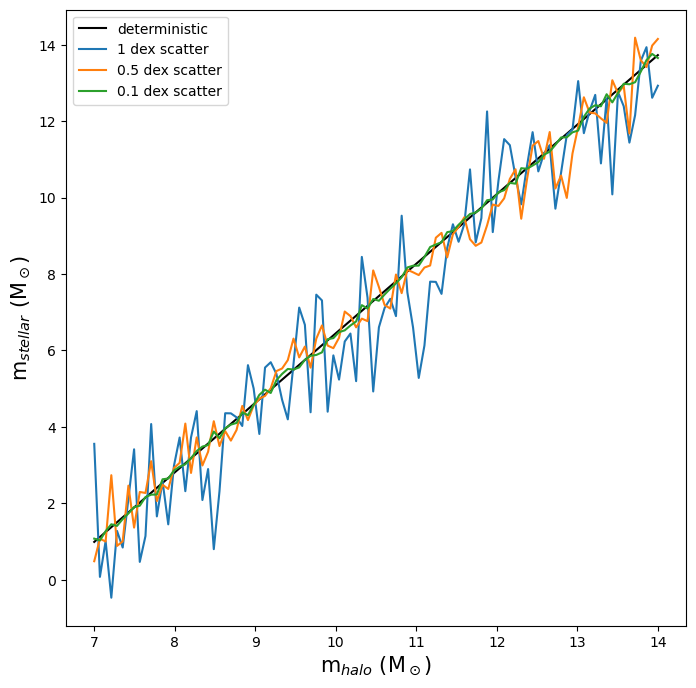

In [6]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses, color="black", label="deterministic")

plt.plot(halo_masses, stellar_masses_2, label="1 dex scatter")
plt.plot(halo_masses, stellar_masses_5, label="0.5 dex scatter")
plt.plot(halo_masses, stellar_masses_15, label="0.1 dex scatter")


plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
#plt.savefig("../figures/SHMR_scatter.png")
plt.show()

In [7]:
stellar_masses_RP = galhalo.lgMs_RP17(halo_masses, 0)
stellar_masses_B = galhalo.lgMs_B13(halo_masses,0)

stellar_masses_RP_1 = galhalo.lgMs_RP17(halo_masses, 0.5)
stellar_masses_B_1 = galhalo.lgMs_B13(halo_masses,0.5)

stellar_masses_RP_2 = galhalo.lgMs_RP17(halo_masses, 1)
stellar_masses_B_2 = galhalo.lgMs_B13(halo_masses,1)

stellar_masses_RP_3 = galhalo.lgMs_RP17(halo_masses, 1.5)
stellar_masses_B_3 = galhalo.lgMs_B13(halo_masses,1.5)

stellar_masses_RP_4 = galhalo.lgMs_RP17(halo_masses, 2)
stellar_masses_B_4 = galhalo.lgMs_B13(halo_masses,2)

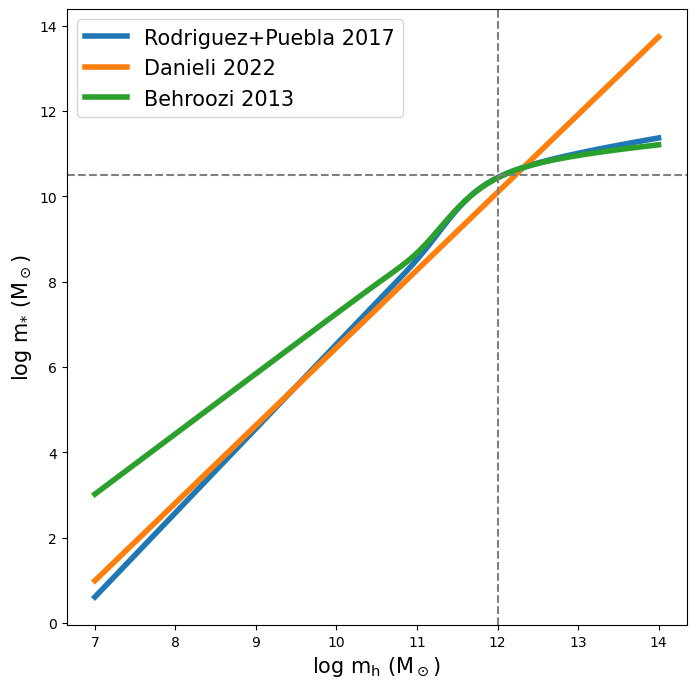

In [8]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_RP, label="Rodriguez+Puebla 2017", lw=4)
plt.plot(halo_masses, stellar_masses, label="Danieli 2022", lw=4)
plt.plot(halo_masses, stellar_masses_B, label="Behroozi 2013", lw=4)

plt.ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
plt.xlabel("log m$_{\mathrm{h}}$ (M$_\odot$)", fontsize=15)
plt.legend(fontsize=15)
plt.axvline(12, color="grey", ls="--")
plt.axhline(10.5, color="grey", ls="--")

plt.show()

In [9]:
dM = 0.1

dMs_dM_B = np.gradient(galhalo.lgMs_B13(halo_masses,0), dM)
dMs_dM_RP = np.gradient(galhalo.lgMs_RP17(halo_masses,0), dM)

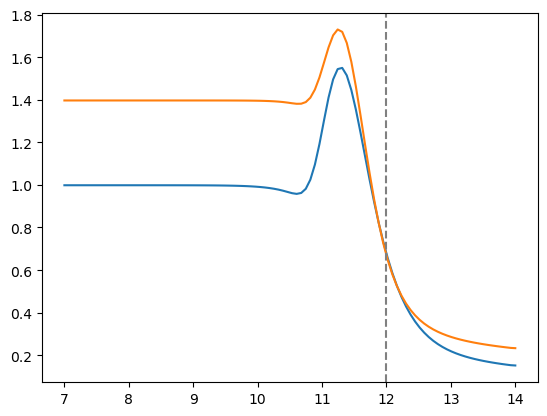

In [10]:
plt.plot(halo_masses, dMs_dM_B)
plt.plot(halo_masses, dMs_dM_RP)
plt.axvline(12, color="grey", ls="--")
plt.show()

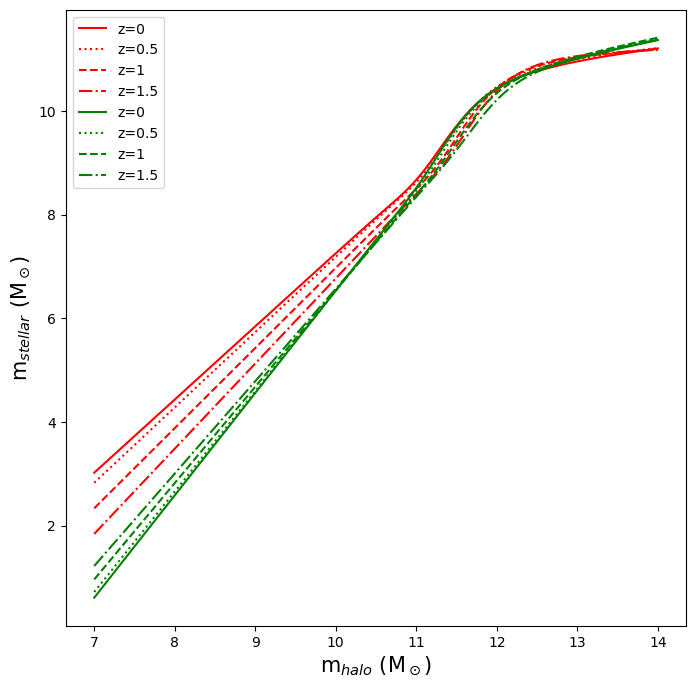

In [11]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_B, label="z=0", color="red")
plt.plot(halo_masses, stellar_masses_B_1, label="z=0.5", color="red", ls=":")
plt.plot(halo_masses, stellar_masses_B_2, label="z=1", color="red", ls="--")
plt.plot(halo_masses, stellar_masses_B_3, label="z=1.5", color="red", ls="-.")

plt.plot(halo_masses, stellar_masses_RP, label="z=0", color="green")
plt.plot(halo_masses, stellar_masses_RP_1, label="z=0.5", color="green", ls=":")
plt.plot(halo_masses, stellar_masses_RP_2, label="z=1", color="green", ls="--")
plt.plot(halo_masses, stellar_masses_RP_3, label="z=1.5", color="green", ls="-.")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()

In [12]:
# def master_SHMR_1D(lgMh, alpha=1.82, delta=0, sigma=None, N_samples=1000, GK_norm=False, beta_norm=False):

#     """_summary_

#     a flexible Stellar to Halo Mass Relation that has a few tricks up its sleeve
#     Returns:
#         numpy array: stellar masses!
#     """

#     M_star_a = 10 # these are the anchor points
#     M_halo_a = 11.67

#     if sigma != None:
#         print("randomly sampling the lognormal PDF", N_samples, "times")

#         if GK_norm == True:
#             alpha_norm = 0.14*sigma**2 + 0.14*sigma+ 1.79
#             lgMs = alpha_norm*(lgMh-M_halo_a)  - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter
        
#         if beta_norm == True:
#             lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter - (sigma**2)/4.605
        
#         else:
#             print("not normalizing for the upscatter")
#             lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter

#     else:
#         print("assuming a deterministic SHMR")
#         lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#         return lgMs

σ(Mpeak) = σ0 + ν(log10 Mpeak − log10 M1)

In [13]:
def SHMR(lgMh, p):
    M_star_a = p[4]
    M_halo_a = 11.67

    M_halo_a = 11.67
    sigma = p[2] + p[3]*(lgMh - M_halo_a)

    lgMs = p[0]*(lgMh-M_halo_a) + p[1]*(lgMh-M_halo_a)**2 + M_star_a
    scatter = np.random.normal(loc=0, scale=sigma, size=(lgMs.shape))
    return lgMs + scatter

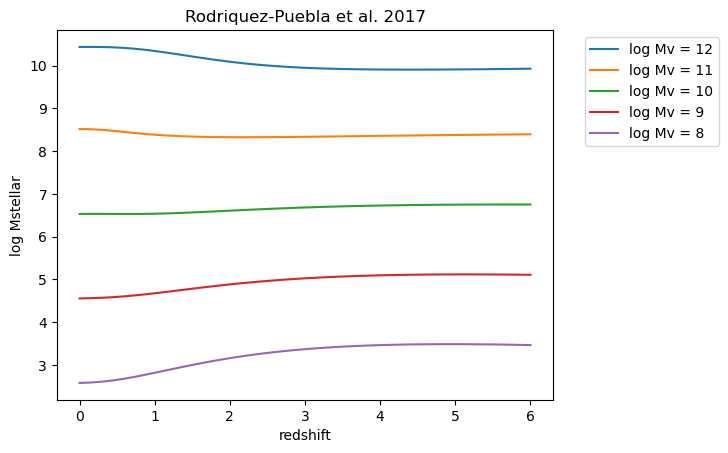

In [14]:
plt.title("Rodriquez-Puebla et al. 2017")

plt.plot(np.linspace(0,6,100), galhalo.lgMs_RP17(12, z=np.linspace(0,6,100)), label="log Mv = 12")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_RP17(11, z=np.linspace(0,6,100)), label="log Mv = 11")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_RP17(10, z=np.linspace(0,6,100)), label="log Mv = 10")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_RP17(9, z=np.linspace(0,6,100)), label="log Mv = 9")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_RP17(8, z=np.linspace(0,6,100)), label="log Mv = 8")

plt.ylabel("log Mstellar")
plt.xlabel("redshift")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

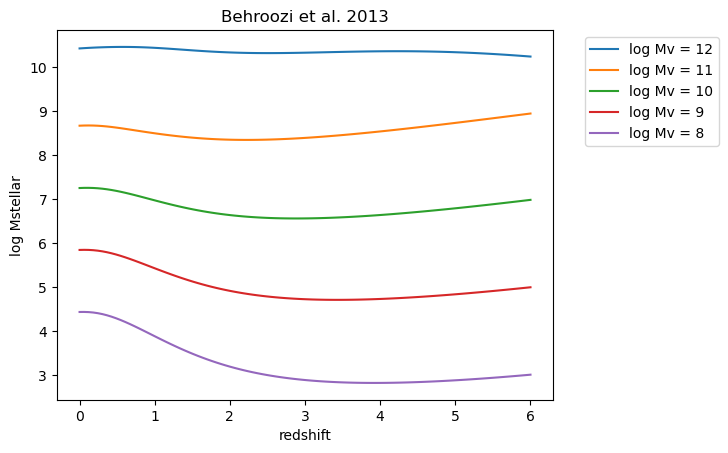

In [15]:
plt.title("Behroozi et al. 2013")

plt.plot(np.linspace(0,6,100), galhalo.lgMs_B13(12, z=np.linspace(0,6,100)), label="log Mv = 12")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_B13(11, z=np.linspace(0,6,100)), label="log Mv = 11")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_B13(10, z=np.linspace(0,6,100)), label="log Mv = 10")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_B13(9, z=np.linspace(0,6,100)), label="log Mv = 9")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_B13(8, z=np.linspace(0,6,100)), label="log Mv = 8")

plt.ylabel("log Mstellar")
plt.xlabel("redshift")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [26]:
lgMh = np.linspace(8,13,20)

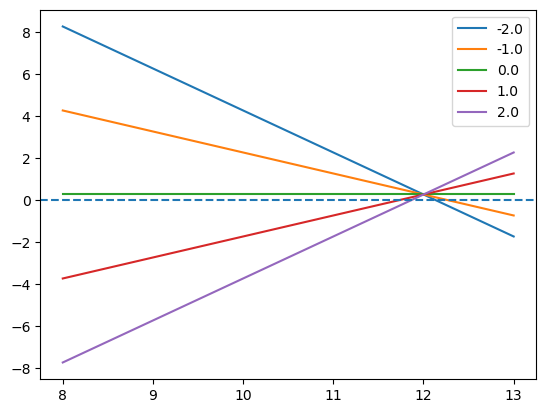

In [28]:
lgMs = []
for i in np.linspace(-2,2,5):
    lgMs_i = 0.25 + i*(lgMh - 12)
    plt.plot(lgMh, lgMs_i, label=str(i))
plt.axhline(0,ls="--")
plt.legend()

### playing with redshift?

In [29]:
mass_example = np.load("../../data/MW-analog/meta_data_psi3/models.npz")["mass"][0:2]
red_example = np.load("../../data/MW-analog/meta_data_psi3/models.npz")["redshift"][0:2]

In [30]:
# theta_0: power law slope 
# theta_1: log normal scatter
# theta_2: the stellar mass anchor point
# theta_3: quadratic term to curve the relation
# theta_4: slope of the scatter as function of log halo mass
# theta_5: the strength of the redshift dependance on the stellar mass anchor point

In [34]:
theta = [2, 0, 10, -0.2, -0.1, 0.1]

In [35]:
simple = jsm_SHMR.simple(theta[0:2], mass_example).flatten()

anchor = jsm_SHMR.anchor(theta[0:3], mass_example).flatten()

curve = jsm_SHMR.curve(theta[0:4], mass_example).flatten()

sigma = jsm_SHMR.sigma(theta[0:5], mass_example).flatten()

redshift = jsm_SHMR.redshift(theta[0:6], mass_example, red_example).flatten()

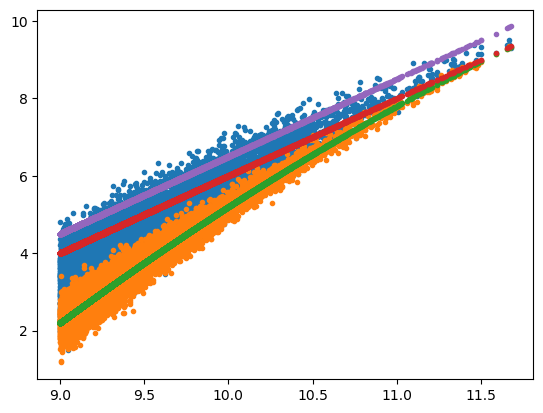

In [41]:
plt.scatter(mass_example.flatten(), redshift, marker=".")
plt.scatter(mass_example.flatten(), sigma, marker=".")
plt.scatter(mass_example.flatten(), curve, marker=".")
plt.scatter(mass_example.flatten(), anchor, marker=".")
plt.scatter(mass_example.flatten(), simple, marker=".")
# plt.plot(mass_example.flatten(), galhalo.lgMs_B13(mass_example.flatten()), color="black")
# plt.plot(mass_example.flatten(), galhalo.lgMs_RP17(mass_example.flatten()), color="black")

plt.show()

In [21]:
import time

start_time = time.monotonic()

simple = jsm_SHMR.simple(theta[0:2], mass_example)

print('seconds: ', time.monotonic() - start_time)

seconds:  0.32212191697908565


In [22]:
start_time = time.monotonic()

anchor = jsm_SHMR.anchor(theta[0:3], mass_example)

print('seconds: ', time.monotonic() - start_time)

seconds:  0.3243722909828648


In [23]:
start_time = time.monotonic()

curve = jsm_SHMR.curve(theta[0:4], mass_example)

print('seconds: ', time.monotonic() - start_time)

seconds:  0.35407366702565923


In [27]:
start_time = time.monotonic()

sigma = jsm_SHMR.sigma(theta[0:5], mass_example)

print('seconds: ', time.monotonic() - start_time)

seconds:  0.5282461250317283


In [25]:
start_time = time.monotonic()

redshift = jsm_SHMR.redshift(theta[0:6], mass_example, red_example)

print('seconds: ', time.monotonic() - start_time)

seconds:  0.5900758749921806


In [26]:
stop[]

SyntaxError: invalid syntax (1197200236.py, line 1)

In [ ]:
def SHMR(lgMh, p):
    M_star_a = 10
    M_halo_a = 11.67

    lgMs = p[0]*(lgMh-M_halo_a) + p[1]*(lgMh-M_halo_a)**2 + M_star_a
    scatter = np.random.normal(loc=0, scale=p[2], size=(lgMs.shape))
    return lgMs + scatter

In [ ]:
halo_masses = np.linspace(8,12,100)

In [ ]:
plt.plot(halo_masses, SHMR.sigmaGrow([1.95, -0.2, 0.1, -0.4], halo_masses))
plt.plot(halo_masses, galhalo.lgMs_B13(halo_masses, 0))
plt.plot(halo_masses, galhalo.lgMs_RP17(halo_masses, 0))
plt.ylim(2,11)

In [ ]:
a3 = np.linspace(0,1,100)
a4 = np.linspace(-3,0,100)

M_halo_a = 11.67

sigma = a3 + (-1)*(11 - M_halo_a)

In [ ]:
lgMh = np.linspace(8,12,100)

In [ ]:
sigma = 0.1 + (-0.3)*(lgMh - 11.67)
plt.scatter(lgMh, sigma)
plt.axhline(0, color="red")
plt.show()

In [ ]:
a3 = np.linspace(0,1,100)
a4 = np.linspace(-3,0,100)

image = np.empty(shape=(100,100))
for i in range(100):
    for j in range(100):
        sigma = a3[i] + (a4[j])*(8 - 11.67)
        image[i,j] = sigma

In [ ]:
plt.imshow(image)
plt.colorbar()

In [ ]:
samples = np.load("../../data/init_val/start9/samples.npy")

In [ ]:
def SHMR_plot(self, data, SHMR):

    self.halo_masses = np.log10(np.logspace(6, 13, 100)) # just for the model

    SHMR_mat = np.zeros(shape=(self.last_samp.shape[0], self.halo_masses.shape[0]))
    sigmas = self.last_samp[:,2]
    norm = mpl.colors.Normalize(vmin=sigmas.min(), vmax=sigmas.max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis_r)
    colors = mpl.cm.viridis_r(np.linspace(0, 1, len(sigmas)))


    a1, a2, a3, a4 = self.truths[0], self.truths[1], 0, self.truths[3] # just to define the fiducial model
    self.fid_Ms = SHMR([a1, a2, a3, a4], self.halo_masses)

    for i,val in enumerate(self.last_samp):  # now pushing all thetas through!
        a1, a2, a3, a4 = val[0], val[1], 0, val[3]
        lgMs = SHMR([a1, a2, a3, a4], self.halo_masses)
        SHMR_mat[i] = lgMs

    plt.figure(figsize=(10, 8))
    for i in SHMR_mat:
        plt.plot(self.halo_masses, i, color=colors[i], lw=1)
    plt.plot(self.halo_masses, galhalo.lgMs_B13(self.halo_masses), color="red", label="Behroozi et al. 2013", ls="--", lw=2)
    plt.plot(self.halo_masses, galhalo.lgMs_RP17(self.halo_masses), color="navy", label="Rodriguez-Puebla et al. 2017", ls="--", lw=2)
    plt.plot(self.halo_masses, self.fid_Ms, color="black", label=str(self.truths), lw=2)

    dp = data.get_data_points(min_mass=self.min_mass)
    plt.scatter(dp[0], dp[1], marker="*", color="black")

    plt.ylim(4,11)
    plt.xlim(7.5,12)
    plt.ylabel("M$_{*}$ (M$_\odot$)", fontsize=15)
    plt.xlabel("M$_{\mathrm{vir}}$ (M$_\odot$)", fontsize=15)
    plt.legend(fontsize=12)
    plt.savefig(self.savedir+"SHMR.png")